In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

green   = '#6d904f'; yellow  = '#e5ae37'; red     = '#fc4f30'
colour = [yellow, green, red]

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

log = pd.read_csv(r'twitter_details.csv')

consumer_key = log['key'][0]
consumer_secret = log['key'][1]
access_token = log['key'][2]
access_token_secret = log['key'][3]

# Create the authentication object
authentication = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Set the access token and access token secret
authentication.set_access_token(access_token, access_token_secret)

# Creat the API object using the auth info
api = tweepy.API(authentication, wait_on_rate_limit=True)

In [2]:
def clean_text(text):
    text = re.sub(r'@[a-zA-Z0-9]+', "", text)  # remove all match @......
    text = re.sub(r'#', "", text) # Remove the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text)  #Removing hyper link

    return text

def get_analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"


def tweet_query(api, text_query):
    query = api.search(q=text_query, lang='en', count=5000)

    # Create a df with a column tweet
    df = pd.DataFrame( [tweet.text for tweet in query], columns=["tweets"])
    df['tweets'] = df["tweets"].apply(clean_text) # cleaning df

    getSubjectivity = lambda x: TextBlob(x).sentiment.subjectivity
    getPolarity = lambda x: TextBlob(x).sentiment.polarity

    df["subjectivity"] = df["tweets"].apply(getSubjectivity)
    df["polarity"] = df["tweets"].apply(getPolarity)
    df["analysis"] = df['polarity'].apply(get_analysis)

    return df


def plot_world_cloud(df):
    all_words = ' '.join([tweets for tweets in df["tweets"]])
    word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


def plot_sentiments(df, colour=colour):
    # print('\n\n')
    val = df.analysis.value_counts()
    plt.bar(val.index, val, color=colour)
    plt.title("Sentiment Analysis")

    for index, v in enumerate(val.values):
        s = '{:.0f}'.format(v)
        plt.text(index, v, str(s), fontsize=14)

    plt.xticks(rotation=90)
    plt.show()

## MTN

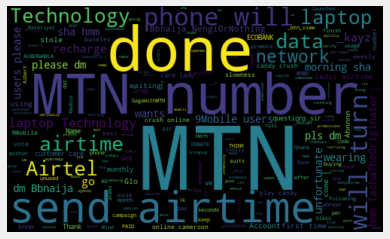

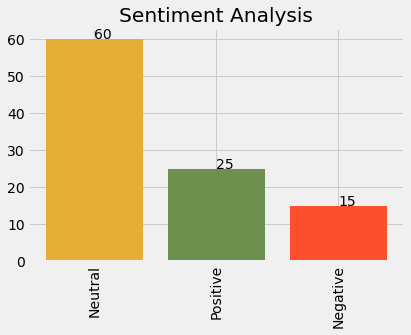

In [3]:
mtn = tweet_query(api, 'mtn')
plot_world_cloud(mtn)
plot_sentiments(mtn)

# Airtel

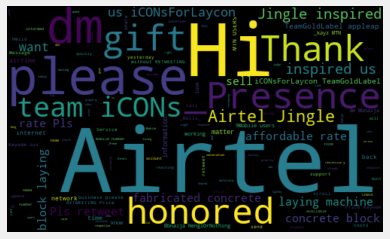

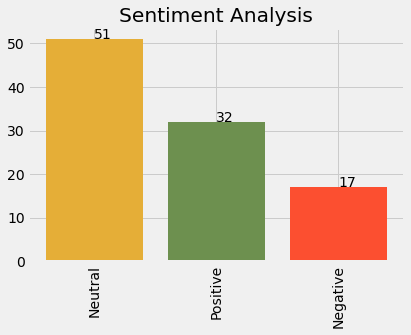

In [4]:
airtel = tweet_query(api, 'airtel')
plot_world_cloud(airtel)
plot_sentiments(airtel)

# Glo

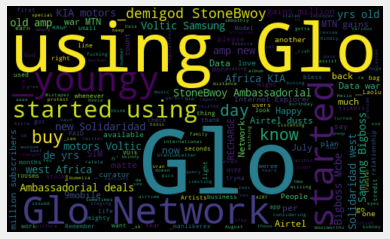

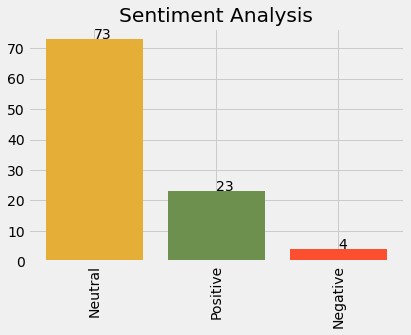

In [5]:
glo = tweet_query(api, 'glo')
plot_world_cloud(glo)
plot_sentiments(glo)

In [ ]:
mtn.analysis.value_counts()